In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_dir = "../../data/dataset/"
subjects = os.listdir(data_dir)
gestures = ["Hello", "Good Morning"]

In [3]:
dataset = pd.DataFrame()

for subject in subjects:
    for gesture in gestures:
        gesture_dir = os.path.join(data_dir, subject, gesture)
        recordings = os.listdir(gesture_dir)
        for recording in recordings:
            file_path = os.path.join(gesture_dir, recording)
            data = pd.read_csv(file_path)

            # ... calculating distance of the index finger
            data["drf1"] = ((data["rf1x"] - data["rpx"]).pow(2) + \
                    # (data["rf1y"] - data["rpy"]).pow(2) + \
                    (data["rf1z"] - data["rpz"]).pow(2)).pow(0.5)

            # ... calculating distance of the middle finger
            data["drf2"] = ((data["rf2x"] - data["rpx"]).pow(2) + \
                    # (data["rf2y"] - data["rpy"]).pow(2) + \
                    (data["rf2z"] - data["rpz"]).pow(2)).pow(0.5)

            # ... normalization
            # data = (data - data.min()) / (data.max() - data.min())

            data["label"] = gestures.index(gesture)

            dataset = pd.concat([dataset, data])

dataset.reset_index(inplace=True)
dataset

,index,time,rpx,rpy,rpz,lpx,lpy,lpz,rf0x,rf0y,...,lf2z,lf3x,lf3y,lf3z,lf4x,lf4y,lf4z,drf1,drf2,label
0,0,0,0.0000,0.000,0.00000,0.000,0.000,0.0000,0.0000,0.000,...,0.0000,0.000,0.000,0.00000,0.000,0.000,0.0000,0.000000,0.000000,0
1,1,1654452188965722,45.6924,282.877,-7.48842,0.000,0.000,0.0000,-20.4213,278.094,...,0.0000,0.000,0.000,0.00000,0.000,0.000,0.0000,103.511856,109.060587,0
2,2,1654452188974362,45.7972,282.877,-7.46517,0.000,0.000,0.0000,-20.3178,278.139,...,0.0000,0.000,0.000,0.00000,0.000,0.000,0.0000,103.527066,109.063834,0
3,3,1654452188983051,45.8944,282.887,-7.44410,0.000,0.000,0.0000,-20.2121,278.171,...,0.0000,0.000,0.000,0.00000,0.000,0.000,0.0000,103.538796,109.069947,0
4,4,1654452188991705,45.9840,282.907,-7.42448,0.000,0.000,0.0000,-20.1072,278.217,...,0.0000,0.000,0.000,0.00000,0.000,0.000,0.0000,103.545827,109.074688,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3398,560,1654452266656926,100.5860,264.568,65.71560,-162.965,269.462,70.8178,71.2816,268.290,...,-17.2582,-149.937,208.396,-8.71760,-161.337,196.499,21.8467,122.321078,134.855468,1
3399,561,1654452266665677,98.6577,263.433,67.21300,-162.239,269.212,71.4774,71.2816,268.290,...,-16.3277,-150.400,207.903,-8.09363,-161.486,196.529,22.4523,123.860219,136.754689,1
3400,562,1654452266674317,97.5780,262.578,69.10500,-161.836,268.670,72.0389,71.2816,268.290,...,-15.3230,-150.095,207.385,-7.58893,-161.656,196.532,22.6091,125.787413,138.848441,1
3401,563,1654452266682940,96.3445,260.628,72.69160,-161.064,267.715,72.8222,71.2816,268.290,...,-15.1544,-150.118,207.941,-8.05552,-161.632,197.004,21.7442,129.422550,142.626222,1


array([<AxesSubplot:title={'center':'drf1'}, xlabel='[label]'>,
       <AxesSubplot:title={'center':'drf2'}, xlabel='[label]'>],
      dtype=object)

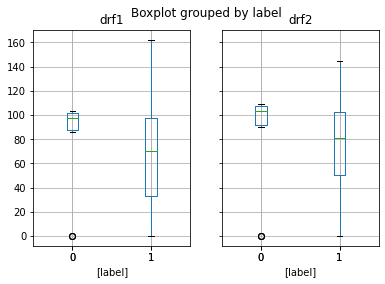

In [4]:
features = dataset[["drf1", "drf2", "label"]]
features.boxplot(by="label")

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [6]:
X = features.drop(columns=["label"]).to_numpy()
y = features["label"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [7]:
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [8]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       580
           1       0.99      0.99      0.99       543

    accuracy                           0.99      1123
   macro avg       0.99      0.99      0.99      1123
weighted avg       0.99      0.99      0.99      1123



In [9]:
import joblib
joblib.dump(clf, "../../model/knn-clf.joblib")

['../../model/knn-clf.joblib']